<a href="https://colab.research.google.com/github/Rezquellah/ML-Intro/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

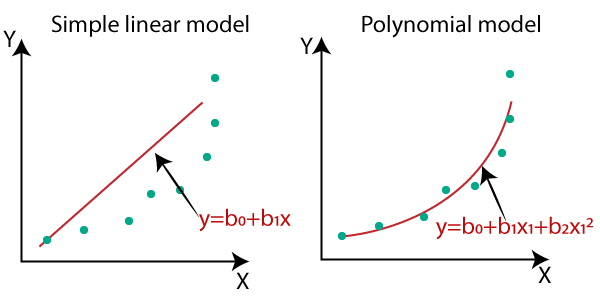

Polynomial regression is a form of linear regression in which the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth degree polynomial.

$y = aX^2 + bX + c$

In this function the vector theta will contain a, b and c, and the X matrix will contain 3 columns (x2, x, 1)

In [75]:
# Libraries
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

In [76]:
# We will generate a random non-linear dataset
x, y = make_regression(n_samples = 100,  n_features= 1, noise= 10)
y = y + abs(y/2)

Text(0.5, 1.0, 'Scatter plot of synthetic data')

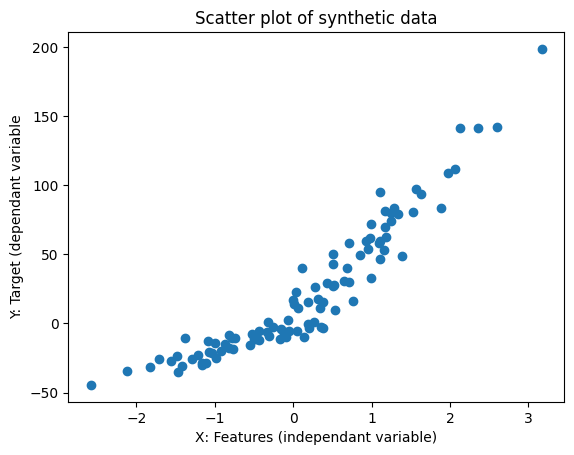

In [77]:
# Data visualisation
plt.scatter(x, y)
plt.xlabel('X: Features (independant variable)')
plt.ylabel('Y: Target (dependant variable')
plt.title('Scatter plot of synthetic data')

In [78]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [79]:
# X and Y don't have the same dimension we should change the dimension of Y
y = y.reshape(y.shape[0], 1)

In [80]:
y.shape

(100, 1)

In [81]:
# The matrix x must contains   [x², x,  1]
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack(((x**2), X))

In [82]:
X.shape

(100, 3)

Initialisation of theta θ
As discused above theta θ will contain the parameter **a**, **b** and **c** and they will be random number

In [83]:
theta = np.random.randn(3, 1)

In [84]:
theta.shape

(3, 1)

In [85]:
theta

array([[-0.76684836],
       [-0.57505915],
       [-0.10306863]])

### Model creation
Now that we have y, X and theta θ we can write the model Y = X.θ

In [86]:
def model(X, theta):
  return X.dot(theta)

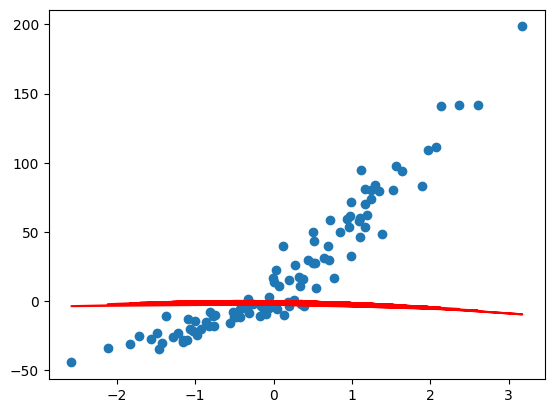

In [87]:
plt.scatter(x, y)
plt.plot(x, model(X,theta), c='r')

As shown on the graph above, the model (represented by the red line) don't fit the data, this is normal because the paramater **a**, **b** and **c** were random, we should calculate the error and apply gradient descent to reduce the error and optimize the model.

In [88]:
def cost_func(X, y, theta):
  m= len(y)
  return 1/(2*m) * np.sum(model(X, theta) - y)**2

In [89]:
cost_func(X, y, theta)

27543.35956393914

In [90]:
def grad(X, y, theta):
  m = len(y)
  return 1/m * X.T.dot(model(X, theta) - y)

In [91]:
def gradient(X, y, theta, learn_rate, n_iter):
  history = np.zeros(n_iter)
  for i in range(0, n_iter):
    theta = theta - learn_rate * grad(X, y, theta)
    history[i] = cost_func(X, y, theta)
  return theta, history

### Model training

In [92]:
final_theta, history = gradient(X, y, theta, 0.01, 800)

In [93]:
final_theta

array([[ 8.07522086],
       [36.83780992],
       [ 6.93676728]])

In [94]:
pred = model(X, final_theta)

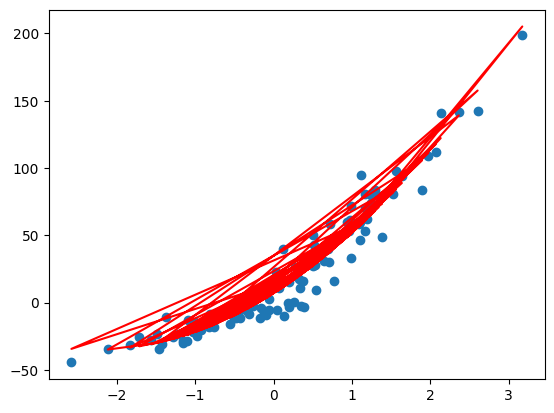

In [95]:
plt.scatter(x, y)
plt.plot(x, pred, c='r')

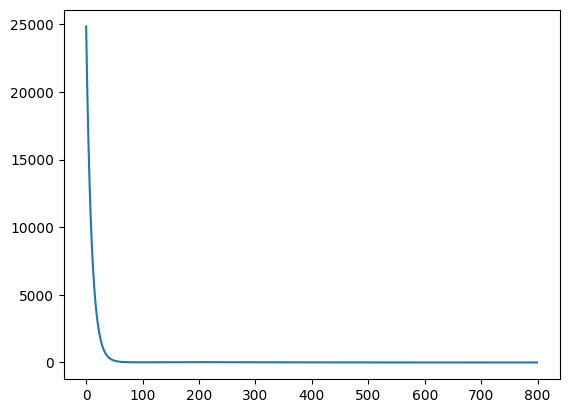

In [96]:
plt.plot(range(800), history)

In [97]:
def R2(y, pred):
  ssres = ((y - pred)**2).sum()
  sstot = ((y - y.mean())**2).sum()
  return 1 - ssres/sstot

In [98]:
R2(y, pred)

0.9384765432976574